In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weights.csv to weights.csv
User uploaded file "weights.csv" with length 2022 bytes


In [0]:
pesos = pd.read_csv('weights.csv', sep=';')

In [6]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [7]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


In [10]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [11]:
pesos['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cf30aec50>,
      dtype=object)

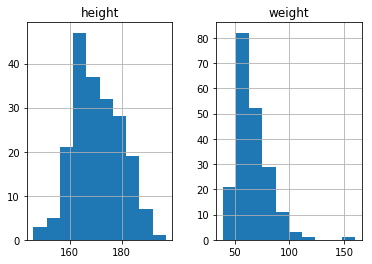

In [13]:
pesos.hist()

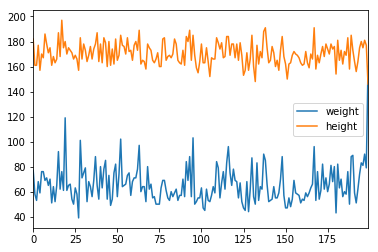

In [14]:
pesos.plot()

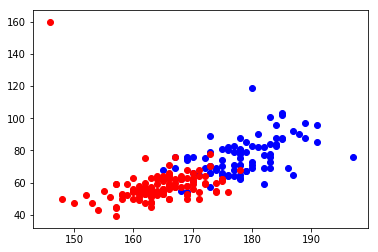

In [20]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

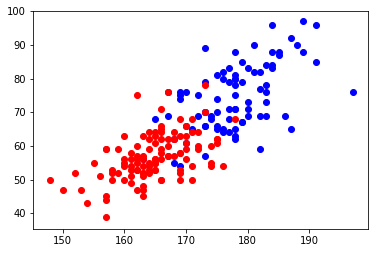

In [21]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

In [22]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [24]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,1
1,0
2,0
3,1
4,0


In [25]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [0]:
x = pesos[['M', 'height']]
y = pesos['weight']

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lin_reg.coef_

array([7.9134644 , 0.73871471])

In [44]:
lin_reg.intercept_

-64.77641734530651

In [0]:
heights = np.linspace(140, 210, 70)
sex_masc = np.ones(70)
sex_fem = np.zeros(70)

coef_sex = float(lin_reg.coef_[0])
coef_height = float(lin_reg.coef_[1])
intercept = float(lin_reg.intercept_)

reta_masc = coef_sex*sex_masc + coef_height*heights + intercept
reta_fem = coef_sex*sex_fem + coef_height*heights + intercept

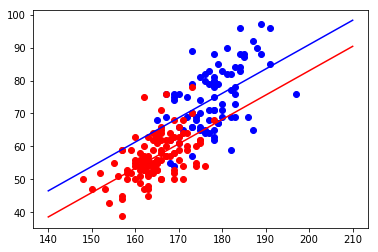

In [46]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_masc, '-', c='blue')
plt.plot(heights, reta_fem, '-', c='red')
plt.show()


In [62]:
lin_reg.predict([[1, 196]])

array([87.92513018])

In [52]:
mean_squared_error(y, lin_reg.predict(x))

49.26672880622364